<a href="https://www.kaggle.com/code/thierrymasters/life-expectancy-and-gdp-correlation?scriptVersionId=144058662" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 ## Investigating the Correlation between GDP and Life Expectancy

### 1. Importing Libraries
For this project the following packages will be used:
* `Pandas`
* `Matplotlib`
* `Seaborn`

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Loading Data
Loading the data and quickly inspecting it.

In [7]:
df = pd.read_csv('data/all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [8]:
df.shape

(96, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [10]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### 3. Analysing Data

We start by creating a helper function that will help in displaying distinct values of a given column.

In [11]:
# Helper function to display unique values of a serie
def show_distinct(serie):
    for item in list(serie.unique()):
        print(item)

The countries represented in the data are:

In [12]:
show_distinct(df['Country'])

Chile
China
Germany
Mexico
United States of America
Zimbabwe


The years represented in the data are:

In [13]:
show_distinct(df['Year'])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


The 'Life Expectancy at Birth (year)' column is too long of a name so we will rename it for the sake of convinience to the acronym LEABY.

In [14]:
# Renaming the column
df.rename(columns={'Life expectancy at birth (years)': 'LEABY',}, inplace=True)
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We start by displaying visualising the evolution of the GDP and the life expectancy for the different countries over the set time period.

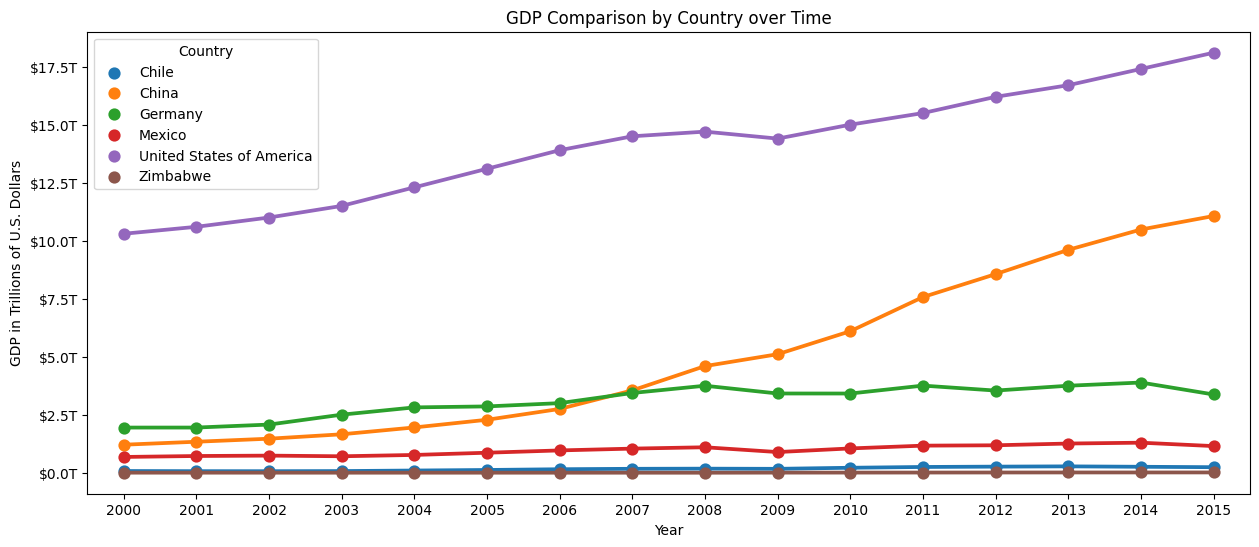

In [15]:
## GDP comparison
from matplotlib.ticker import FuncFormatter

# Function to format the y label
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)

# Set the figure size
f, ax = plt.subplots(figsize=(15, 6))

# Create a point plot
ax =sns.pointplot(x="Year", y="GDP", hue="Country", data=df)
ax.yaxis.set_major_formatter(formatter)
ax.set_title("GDP Comparison by Country over Time")
ax.set_ylabel("GDP in Trillions of U.S. Dollars")

# Display the plot
plt.show()

From the plot above, we can observe a few tendencies within the time frame from 2000 to 2015:
* United States and China saw their GDP skyrocket, respectively, going from $10 trillion to $17.5 trillion and $1 trillion to $10 trillion
* Although the are some movements, it is only after 2008 that we see the most changes in the data as all countries are affected.
* However, Zimbabwe's GDP remains unchanged.

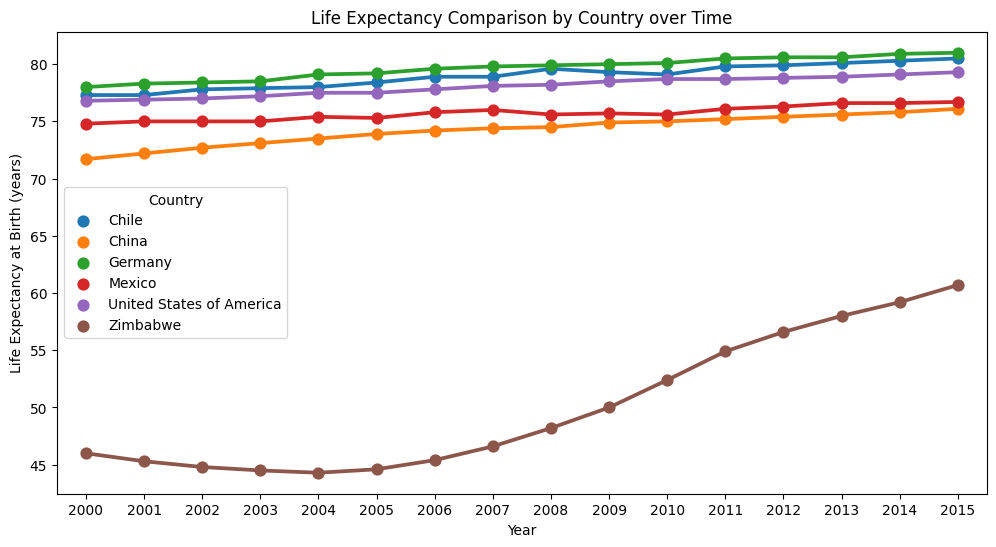

In [16]:
## Examining Life Expectancy over years
# Set the figure size
f, ax = plt.subplots(figsize=(12, 6))

# Create a point plot
ax =sns.pointplot(x="Year", y="LEABY", hue="Country", data=df)
ax.set_title("Life Expectancy Comparison by Country over Time")
ax.set(ylabel="Life Expectancy at Birth (years)")

# Display the plot
plt.show()

Although there are some changes observed over the years, the most noticeable one is from Zimbabwe

In [17]:
# Average life expectancy for each country
average_leaby = df.groupby('Country')['LEABY'].mean().sort_values(ascending=False)
average_leaby


Country
Germany                     79.65625
Chile                       78.94375
United States of America    78.06250
Mexico                      75.71875
China                       74.26250
Zimbabwe                    50.09375
Name: LEABY, dtype: float64

The average life expectancy exceeds 70 years except for Zimbabwe. This can be explain with the decrease that happened between 2000 and 2005.

#### Distribution of Life Expectancy

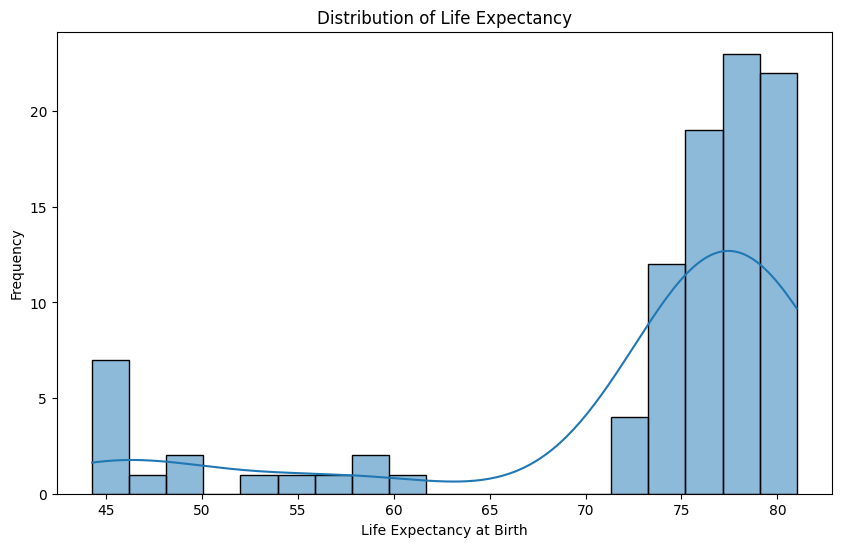

In [18]:
# Plot the distribution of life expectancy using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['LEABY'], kde=True)
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()

### Correlation

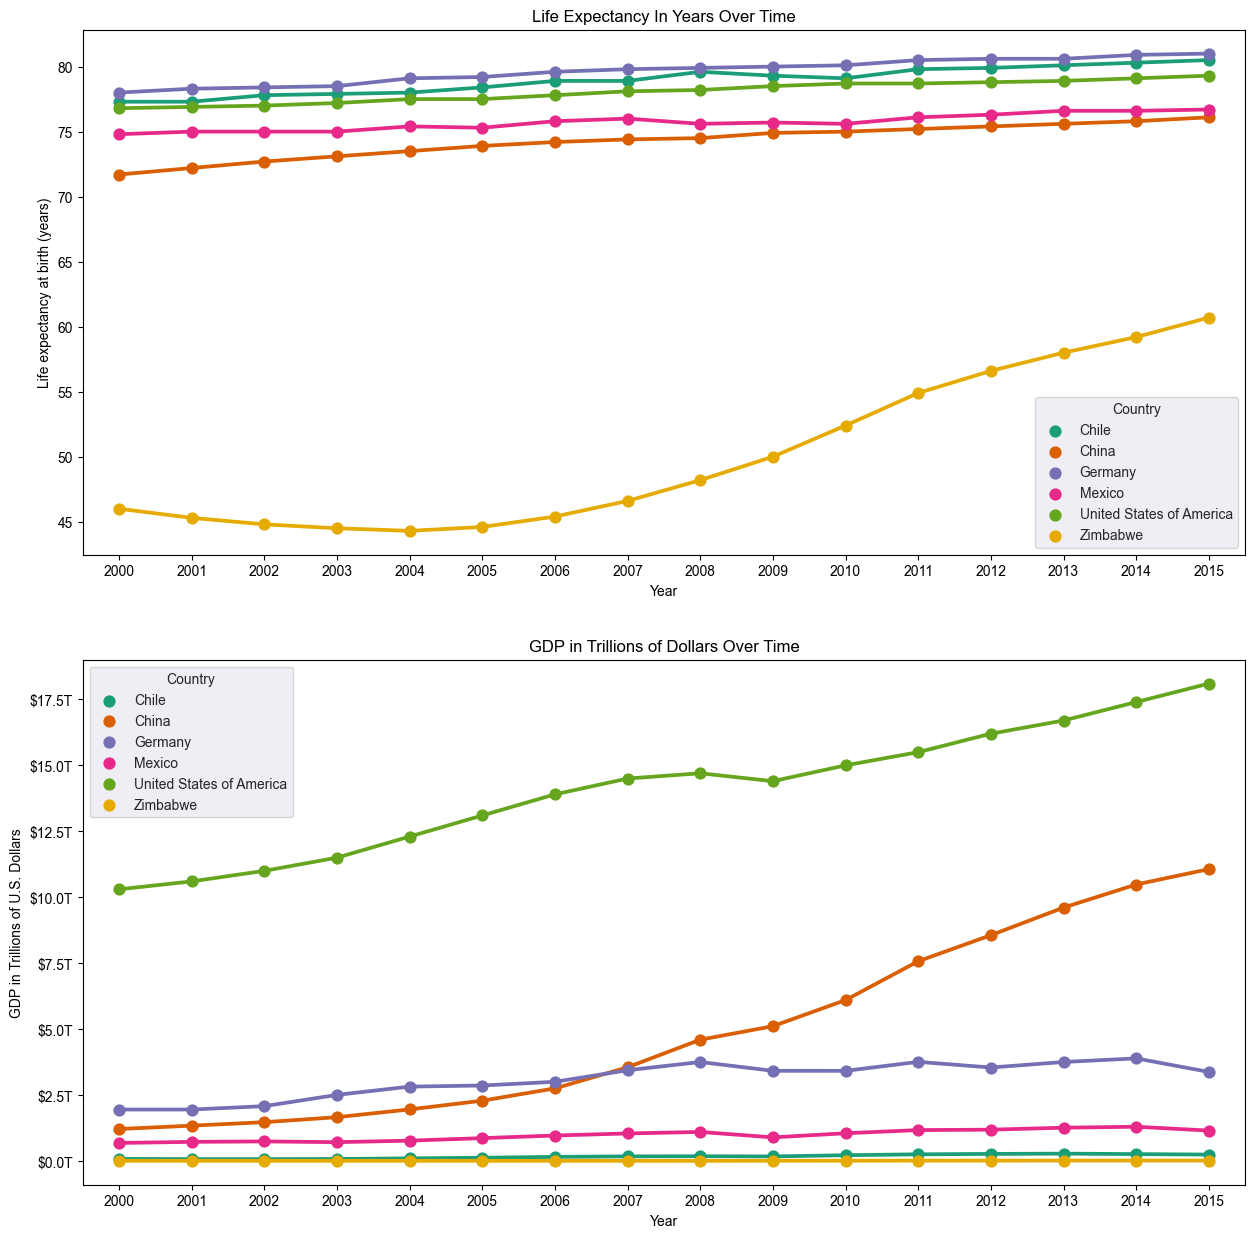

In [19]:
# Set the figure size
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))


# Create point plots
sns.set_style("dark")
sns.set_palette("Dark2")
ax1 = sns.pointplot(x="Year", y="LEABY", hue = "Country", data=df, ax=ax1)
ax2 = sns.pointplot(x="Year", y="GDP", hue = "Country", data=df, ax=ax2)
ax2.yaxis.set_major_formatter(formatter)
ax1.set(ylabel="Life expectancy at birth (years)")
ax2.set(ylabel="GDP in Trillions of U.S. Dollars")
ax2.set_title("GDP in Trillions of Dollars Over Time")
ax1.set_title("Life Expectancy In Years Over Time")

# Display plot
plt.show()

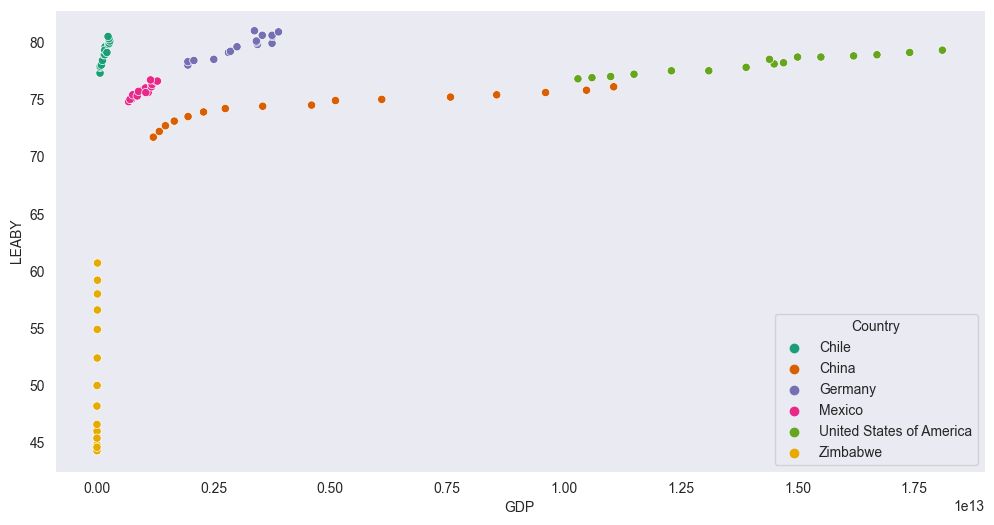

In [20]:
# Create scatter plot
f, ax3 = plt.subplots(figsize=(12, 6))

ax3 = sns.scatterplot(x='GDP', y='LEABY', hue='Country', data=df)

plt.show()

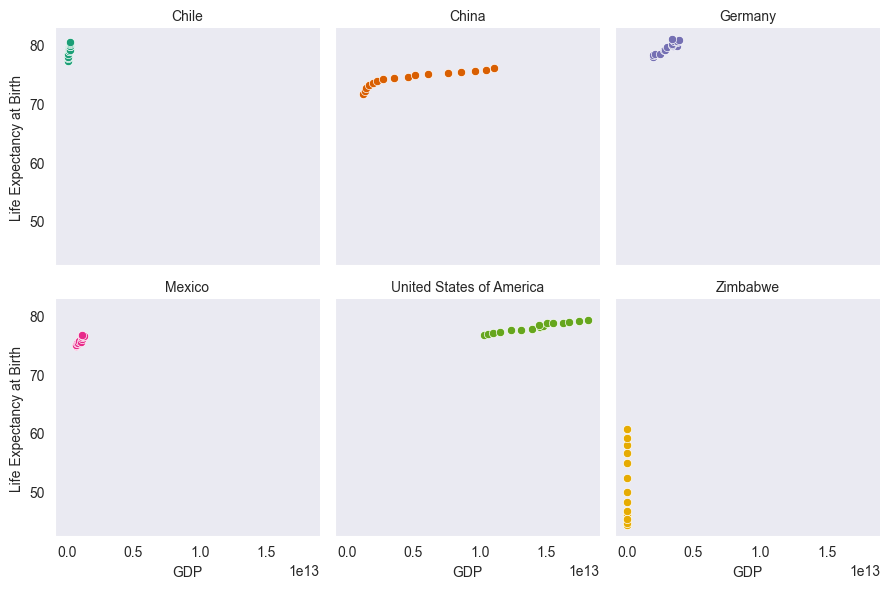

In [21]:
# Create scatter plot
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=3, hue='Country')
g.map(sns.scatterplot, 'GDP', 'LEABY')

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('GDP', 'Life Expectancy at Birth')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [22]:
# Calculate correlation for each country
correlations = df.groupby('Country')[['GDP', 'LEABY']].corr().iloc[0::2, -1]

# Print correlation for each country
for country, correlation in correlations.items():
    print(f"Correlation for {country}: {correlation:.2f}")

Correlation for ('Chile', 'GDP'): 0.95
Correlation for ('China', 'GDP'): 0.91
Correlation for ('Germany', 'GDP'): 0.93
Correlation for ('Mexico', 'GDP'): 0.93
Correlation for ('United States of America', 'GDP'): 0.98
Correlation for ('Zimbabwe', 'GDP'): 0.97


We can see that the is a positive correlation between GDP and life expectancy for each country except Zimbabwe where we observe an amelioration of the life expectancy only.